In [17]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

import pandas as pd
import tensorflow
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
print(f"Data_frame shape : {df.shape}")
print(f"Data_frame columns : {df.columns}")

Data_frame Shape : (10000, 14)
Data_frame Columns : Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


# 欄位說明
- RowNumber: 列編號
- CustomerId: 客戶 id
- Surname: 姓
- CreditScore: 信用評級
- Geography: 所在區域
- Gender: 性別
- Age: 年齡
- Tenure: 成為客戶的時間
- Balance: 存款數
- NumOfProducts: 使用本銀行多少的產品
- HasCrCard: 是否有信用卡
- IsActiveMember: 是否為活躍用戶
- EstimatedSalary: 預估薪水
- Exited: 是否會不用本銀行的服務


Exited 欄位是我們要預估的結果。也就是說，我們要處理的是「分類」問題。

將客戶分成兩類：會離開，以及不會離開。

##### Split $x$ and $y$

In [8]:
x = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
x.head(10)
y = df[['Exited']]

In [9]:
lc = LabelEncoder()
x.Geography = lc.fit_transform(x.Geography)
x.head(10)

/var/folders/dw/6tsyqnjx01183dqzn6ch546c0000gn/T/ipykernel_46851/1274062941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Geography = lc.fit_transform(x.Geography)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
5,645,2,Male,44,8,113755.78,2,1,0,149756.71
6,822,0,Male,50,7,0.00,2,1,1,10062.80
7,376,1,Female,29,4,115046.74,4,1,0,119346.88
8,501,0,Male,44,4,142051.07,2,0,1,74940.50
9,684,0,Male,27,2,134603.88,1,1,1,71725.73


In [10]:
# One hot Encoder
x = pd.get_dummies(x, prefix='Geo', prefix_sep='_', columns=['Geography'], drop_first=True)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_1,Geo_2
0,619,Female,42,2,0.00,1,1,1,101348.88,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,False,True


In [11]:
x.Gender = lc.fit_transform(x.Gender)
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_1,Geo_2
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True
5,645,1,44,8,113755.78,2,1,0,149756.71,False,True
6,822,1,50,7,0.00,2,1,1,10062.80,False,False
7,376,0,29,4,115046.74,4,1,0,119346.88,True,False
8,501,1,44,4,142051.07,2,0,1,74940.50,False,False
9,684,1,27,2,134603.88,1,1,1,71725.73,False,False


##### split training set and testing set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

##### Standardization

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(f"x_train : {x_train}")

x_train : [[-0.09792126  0.92295821 -0.55759842 ... -0.76862426 -0.56987189
  -0.5731713 ]
 [-1.12612023  0.92295821  0.01725942 ... -1.39359887 -0.56987189
  -0.5731713 ]
 [-0.62230274 -1.08347268  3.5622161  ... -1.49739308 -0.56987189
  -0.5731713 ]
 ...
 [ 0.89943174  0.92295821 -0.36597914 ...  1.41400417 -0.56987189
  -0.5731713 ]
 [-0.62230274 -1.08347268 -0.07855022 ...  0.84625811 -0.56987189
   1.74467913]
 [-0.28299708 -1.08347268  0.87954618 ...  0.32689267  1.75478035
  -0.5731713 ]]


##### Construct Model

In [19]:
print(f"x_shape : {x.shape}")

x_shape : (10000, 11)


In [20]:
model = keras.models.Sequential()
# 1 layer
model.add(Dense(6, input_dim= x.shape[1], activation='relu'))
#model.add(Dense(6, input_dim=x_train.shape[1], activation='relu'))
# 2 layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
history=model.fit(x_train, y_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 0s 344us/step - loss: 0.5255 - accuracy: 0.7976
Epoch 2/50
219/219 [==============================] - 0s 352us/step - loss: 0.4963 - accuracy: 0.7977
Epoch 3/50
219/219 [==============================] - 0s 303us/step - loss: 0.4834 - accuracy: 0.7977
Epoch 4/50
219/219 [==============================] - 0s 300us/step - loss: 0.4739 - accuracy: 0.7977
Epoch 5/50
219/219 [==============================] - 0s 299us/step - loss: 0.4658 - accuracy: 0.7977
Epoch 6/50
219/219 [==============================] - 0s 299us/step - loss: 0.4590 - accuracy: 0.7977
Epoch 7/50
219/219 [==============================] - 0s 576us/step - loss: 0.4531 - accuracy: 0.7977
Epoch 8/50
219/219 [==============================] - 0s 301us/step - loss: 0.4482 - accuracy: 0.7977
Epoch 9/50
219/219 [==============================] - 0s 300us/step - loss: 0.4438 - accuracy: 0.7977
Epoch 10/50
219/219 [==============================] - 0s 305us/step - loss: 0.440

In [23]:
eloss, eacc = model.evaluate(x_test,y_test)
print(f'The loss on the test set:{eloss:.2f}')
print(f'The accuracy on the test set:{eacc:.2f}')

94/94 [==============================] - 0s 352us/step - loss: 0.3663 - accuracy: 0.8540
The loss on the test set:0.37
The accuracy on the test set:0.85


##### Prediction

In [24]:
y_pred = model.predict(x_test)
y_pred[:10]

94/94 [==============================] - 0s 310us/step


array([[0.36691153],
       [0.33730274],
       [0.26101616],
       [0.07708058],
       [0.12938337],
       [0.62297803],
       [0.08247248],
       [0.02168259],
       [0.14389062],
       [0.81418437]], dtype=float32)

In [25]:
# 將預測的資料轉成可閱讀
y_pred =y_pred >=0.5
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [26]:
# boolean invert into digital 0/1
y_pred_classes = y_pred.astype(int)
y_pred_classes[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [27]:
# compare to the answer
y_test[:10]

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
8225,1
5506,0
6451,0
2670,1
3497,1


<Axes: >

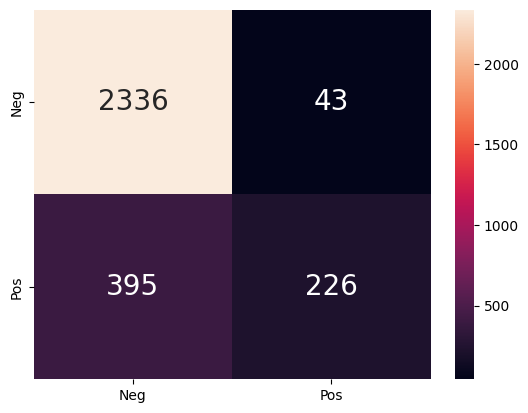

In [28]:
#draw a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_classes)

df_cm = pd.DataFrame(cm, index=['Neg','Pos'],
                     columns=['Neg','Pos'])

sns.heatmap(df_cm, annot=True, annot_kws={'size':20},fmt='d')

<Axes: >

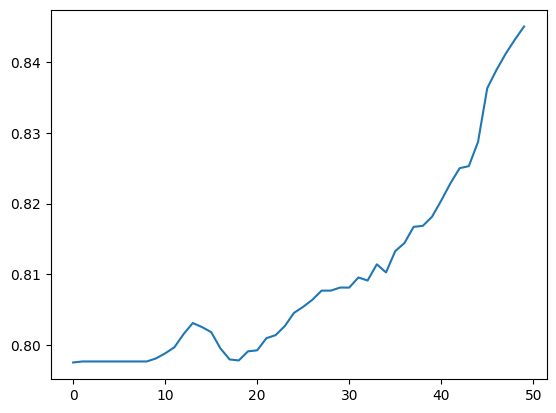

In [30]:
sns.lineplot(x=range(50),y=history.history['accuracy'] )

<Axes: >

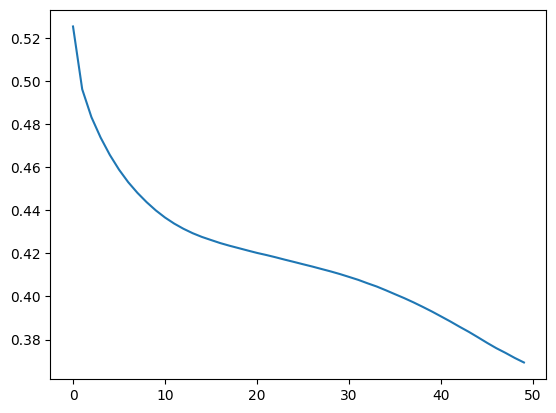

In [31]:
sns.lineplot(x=range(50),y=history.history['loss'] )